In [6]:
import numpy as np
import matplotlib.pyplot as plt

class LinearSchedule(object):
    """ This schedule returns the value linearly"""

    def __init__(self, start_value, end_value, duration):
        # start value
        self._start_value = start_value
        # end value
        self._end_value = end_value
        # time steps that value changes from the start value to the end value
        self._duration = duration
        # difference between the start value and the end value
        self._schedule_amount = end_value - start_value

    def get_value(self, time):
        # logic: if time > duration, use the end value, else use the scheduled value
        """ CODE HERE: return the epsilon for each time step within the duration.
        """
        if time > self._duration:
            return self._end_value
        else:
            return self._start_value + (time / self._duration * (self._end_value - self._start_value))


class EpsilonDownUpDown:
    # It looks like this
    """
    e1 --- \
           .\  * -------- e3
           . \ |\
           .  \| \
    e2 ----+-- *  \ ----- e4
           .   .   .
           .   .   .
           0   t1  t2

    """

    def __init__(self, e1, e2, e3, e4, t1, t2):
        self.t1 = t1
        self.t2 = t2

        self.schedules = [
            LinearSchedule(start_value=e1, end_value=e2, duration=t1),
            LinearSchedule(start_value=e3, end_value=e4, duration=t2 - t1)
        ]

    def get_value(self, t):
        if t < self.t1:
            return self.schedules[0].get_value(t)
        else:
            return self.schedules[1].get_value(t - self.t1)

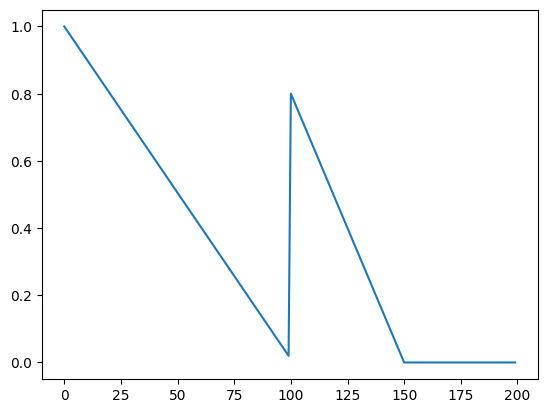

In [10]:
from matplotlib import pyplot as plt

schedule = EpsilonDownUpDown(1, 0.01, 0.8, 0, 100, 150)
x = list(range(200))
y = [schedule.get_value(v) for v in x]

plt.plot(x, y)